<h1 style='text-align:center'>Investigative Analysis of Heart Disease Diagnosis</h1>

Dataset <a href="https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv">Heart Disease UCI</a>

<a id="section_n" name="section_n"></a>

## Table of Contents

* [1. Introduction](#chapter2)
    * [Heart Disease](#section_2_1)
    * [Relevant Study](#section_2_2)
    * [Research Question and Problem Statement](#section_2_3)
    * [Data Description](#section_2_4)
    * [Executive Summary](#section_2_5)
    * [Variable Description](#section_2_6)
* [2. Data Analysis and Exploration](#chapter3)
    * [Data Preparation](#section_3_1)
    * [Missing Values](#section_3_2)
    * [Encoding](#section_3_4)
    * [Exploratory Analysis and Data Visualization](#section_3_5)
* [3. Algorithm Implementation](#chapter4)
    * [Data Preparation](#section_4_1)
    * [Training A Model](#section_4_2)
    * [Training A State of The Art Model](#section_4_3)
    * [Compare Model Performance](#section_4_4)
    * [Compare Best Dataset](#section_4_5)
    * [Future Work](#section_4_6)
    * [Conclusion](#section_4_7)

research / latex references

*  https://0-pubmed-ncbi-nlm-nih-gov.innopac.wits.ac.za/2756873/  International application of a new probability algorithm for the diagnosis of coronary artery disease https://0-www-sciencedirect-com.innopac.wits.ac.za/science/article/pii/0002914989905249?via%3Dihub

* Categories https://rdrr.io/github/coatless/ucidata/man/heart_disease.html#heading-3 

* Another paper https://www.cabdirect.org/cabdirect/abstract/19711403775  
Coronary heart disease in seven countries.

 
*  Heart failure https://my.clevelandclinic.org/health/diseases/17069-heart-failure-understanding-heart-failure

* Heart Disease https://my.clevelandclinic.org/health/diseases/16898-coronary-artery-disease

<a id="chapter2" name="chapter2">chapter2</a> 

<h2 style="text-align:center">Introduction: Heart Disease Diagnosis</h2>

<a id="section_2_1" name="section_2_1">section_2_1</a>

<h4 style="color:lightcoral"><strong>Heart Disease</strong></h4>

<a id="section_2_2" name="section_2_2">section_2_2</a>

<h4 style="color:lightcoral"><strong>Relevant Study</strong></h4>

<a id="section_2_3" name="section_2_3">section_2_3</a>

<h4 style="color:lightcoral"><strong>Researh Question and Problem</strong></h4>

> <strong>Hypothesis:</strong>

> <strong>Relationships</strong>:

> <strong>Predictions</strong>: 

<a id="section_2_4" name="section_2_4">section_2_4</a>

<h4 style="color:lightcoral"><strong>Data Description</strong></h4>

<strong style="color:lightcoral">Age:</strong> age in years

<strong style="color:lightcoral">Sex</strong>
> 1 = Male

> 2 = Female



<strong style="color:lightcoral">Chol: Serum Cholestoral in mg/dl</strong>
> $ x \in \mathbb{R}$ 


<strong style='color:lightcoral'>Trestbps: Resting Blood Pressure (in mm Hg on admission to the hospital)</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:lightcoral">Chest Pain Type</strong>
> Value 1 = Typical Angina

> Value 2 = Atypical Angina

> Value 3 = Non-Anginal Pain

> Value 4 = Asymptomatic



<strong style="color:lightcoral">Thalach: Maximum Heart Rate Achieved</strong>
> $ x \in \mathbb{R}$ 


<strong style="color:lightcoral">Exang: Exercise Induced Angina </strong>
> 1 = Yes

> 0 = No

<strong style="color:lightcoral">Fasting Blood Sugar > 120 mg</strong>
> 1 = True

> 2 = False 


<strong style="color:lightcoral">Resting Electrocardiographic Results</strong>
>  Value 0=  Normal

>  Value 2=Having ST-T Wave Abnormality (T Wave Inversions)

>  Value 3= Showing Probable or Definite Left Ventricular Hypertrophy

<strong style='color:lightcoral'>OldPeak = ST Depression Induced by Exercise Relative to Eest</strong>
> $ x \in \mathbb{R}$ 



<strong style='color:lightcoral'>ca: Number of Major Vessels (0-3) colored by flourosopy</strong>

<strong style='color:lightcoral'>thal: </strong>
> 3 = normal

> 6 = fixed defect

> 7 = reversable defect

<strong style="color:lightcoral">Slope: The Slope of the Peak Exercise of ST Segment</strong>
>  Value 1= Upsloping

>  Value 2= Flat

>  Value 3= Downsloping


<strong style="color:lightcoral">Target: Presence of Heart Disease</strong>
>  Value 0= Absence

>  Value 1= Presence


<a id="section_2_5" name="section_2_5">section_2_5</a>

<h4 style="color:lightcoral"><strong>Executive Summary</strong></h4>

<a id="chapter3" name="chapter3">chapter3</a> 

<h2 style="text-align:center">Data Analysis and Exploration</h2>

<a id="section_3_1" name="section_3_1">section_3_1</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import engine.data_preparation as dp
import engine.data_visualization as dv
import engine.logistic_regression as lr
import engine.accuracy as acc
import seaborn as sns
import warnings
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
warnings.filterwarnings('ignore')
%load_ext autoreload

%autoreload

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Read dataset 

> Appropriately change data types

> Description 
> * Number of rows
> * Number of features

> Is the data balanced ?


In [2]:
dir_str = "Datasets/data/processed.{}.data"
names = {"age":"Age","sex":"Sex","cp":"Chest Pain Type","trestbps":"Resting Blood Pressure","chol":"Serum Cholestoral In mg/dl",
         "fbs":"Fasting Blood Sugar > 120 mg/dl","restecg":"Resting Electrocardiographic Results","thalach":"Duration of Exercise In Minutes",
         "exang":"Exercise Induced Angina","oldpeak":"ST Depression Induced By Exercise","slope":"The Slope of The Peak Exercise ST Segment",
         "ca":"Number of Major Vessels","thal":"Normal/Fixed or Reversable Defect","num":"Presence"
        }
convert_dict = {'sex': int,'cp': int,'fbs':int,'restecg':int,'exang':int,'slope':int,'ca':int,'num':int}
columns = list(names.keys())

In [3]:
cleveland = pd.read_csv(dir_str.format("cleveland"),names=columns,na_values='?')
hungarian = pd.read_csv(dir_str.format("hungarian"),names=columns,na_values='?')
switzerland = pd.read_csv(dir_str.format("switzerland"),names=columns,na_values='?')
va = pd.read_csv(dir_str.format("va"),names=columns,na_values='?')
print("{}: Number of Rows: {} x Number of Columns: {} ".format("cleveland",len(cleveland),len(cleveland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("hungarian",len(hungarian),len(hungarian.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("switzerland",len(switzerland),len(switzerland.columns)))
print("{}: Number of Rows: {} x Number of Columns: {} ".format("long beach",len(va),len(va.columns)))
print('======================================================================================================')
cleveland.head()

cleveland: Number of Rows: 303 x Number of Columns: 14 
hungarian: Number of Rows: 294 x Number of Columns: 14 
switzerland: Number of Rows: 123 x Number of Columns: 14 
long beach: Number of Rows: 200 x Number of Columns: 14 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
cleveland = dp.group_target(cleveland);hungarian =  dp.group_target(hungarian)
switzerland = dp.group_target(switzerland);va =  dp.group_target(va)
heart_data = pd.concat([cleveland,hungarian,switzerland,va])
heart_data = heart_data.drop_duplicates()

<a id="section_3_2" name="section_3_2">section_3_2</a>

<h4 style="color:lightcoral"><strong>Missing Values</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Create 3 different datasets from:

> Dropping values

> Replacing missing values with the means

In [5]:
# ============== Drop Missing Values
drop_missing_cleveland = (cleveland.copy().dropna()).astype(convert_dict)
drop_missing_hungarian = ( hungarian.copy().dropna()).astype(convert_dict)
drop_missing_switzerland = (switzerland.copy().dropna()).astype(convert_dict)
drop_missing_va = (va.copy().dropna()).astype(convert_dict)
drop_missing_heart = (heart_data.copy().dropna()).astype(convert_dict) # This is the combined dataset


# ================ Mode Dataset  - Missing values replaced with the mode
mode_cleveland = ((dp.replace_missing_with_mode(cleveland.copy())).astype(convert_dict)).drop_duplicates()
mode_hungarian = ((dp.replace_missing_with_mode(hungarian.copy())).astype(convert_dict)).drop_duplicates()
mode_switzerland = ((dp.replace_missing_with_mode(switzerland.copy())).astype(convert_dict)).drop_duplicates()
mode_va = ((dp.replace_missing_with_mode(va.copy())).astype(convert_dict)).drop_duplicates()
mode_heart = ((dp.replace_missing_with_mode(heart_data.copy())).astype(convert_dict)).drop_duplicates()

<a id="section_3_3" name="section_3_3">section_3_3</a>

<h4 style="color:lightcoral"><strong>Encoding</strong></h4>
<strong style="color:lightcoral">Goals</strong>: Encode the data for model preparation

> One-Hot encode dataset


In [6]:
# ============== Drop Missing Values
encode_drop_missing_cleveland = dp.one_hot_encoding_2(drop_missing_cleveland)
encode_drop_missing_hungarian = dp.one_hot_encoding_2(drop_missing_hungarian)
encode_drop_missing_switzerland = dp.one_hot_encoding_2(drop_missing_switzerland)
encode_drop_missing_va = dp.one_hot_encoding_2(drop_missing_va)
encode_drop_missing_heart = dp.one_hot_encoding_2(drop_missing_heart)

# ================ Mode Dataset  - Missing values replaced with the mode
encode_mode_cleveland = dp.one_hot_encoding_2(mode_cleveland)
encode_mode_hungarian = dp.one_hot_encoding_2(mode_hungarian)
encode_mode_switzerland = dp.one_hot_encoding_2(mode_switzerland)
encode_mode_va = dp.one_hot_encoding_2(mode_va)
encode_mode_heart = dp.one_hot_encoding_2(mode_heart)

<a id="section_3_5" name="section_3_5">section_3_5</a>

<h4 style="color:lightcoral"><strong>Exploratory Analysis and Data Visualization</strong></h4>


> Countplots

> Histogram

> Box Plot


In [7]:
categories = list(convert_dict.keys())
continuous = list(filter(lambda x:x not in categories,drop_missing_cleveland.columns))
drop_missing_cleveland

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1,1,145.0,233.0,1,1,150.0,0,2.3,1,0,6.0,0
1,67.0,1,1,160.0,286.0,0,1,108.0,1,1.5,1,1,1.0,1
2,67.0,1,1,120.0,229.0,0,1,129.0,1,2.6,1,1,7.0,1
3,37.0,1,1,130.0,250.0,0,0,187.0,0,3.5,1,0,1.0,0
4,41.0,0,1,130.0,204.0,0,1,172.0,0,1.4,1,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0,1,140.0,241.0,0,0,123.0,1,0.2,1,0,7.0,1
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,1,0,7.0,1
299,68.0,1,1,144.0,193.0,1,0,141.0,0,3.4,1,1,7.0,1
300,57.0,1,1,130.0,131.0,0,0,115.0,1,1.2,1,1,7.0,1


<AxesSubplot:xlabel='sex', ylabel='age'>

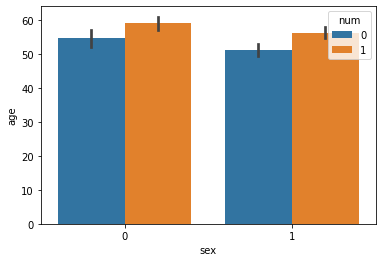

In [8]:
description_dataset = dp.make_description_dataset(drop_missing_cleveland,categories)
sns.barplot(x="sex", y="age", data=drop_missing_cleveland,hue='num')

<AxesSubplot:xlabel='num', ylabel='count'>

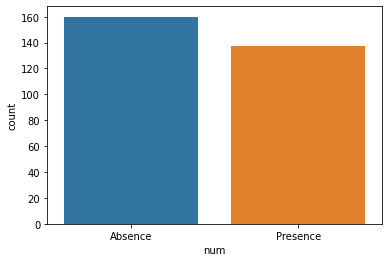

In [9]:
sns.countplot(x="num",data=description_dataset)

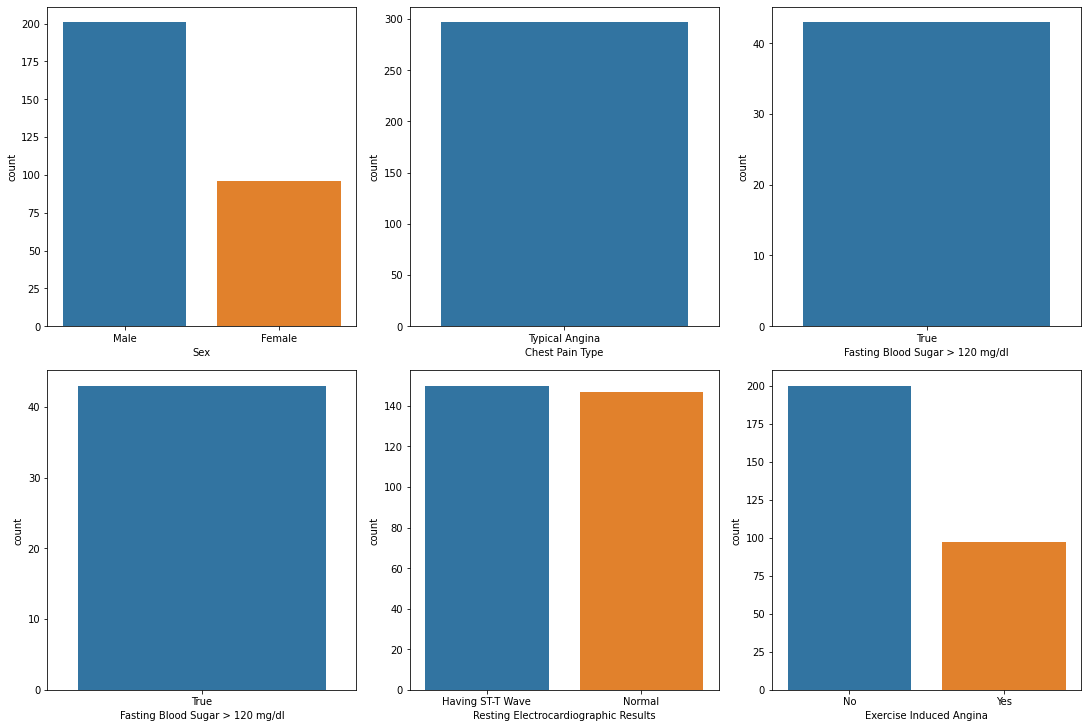

In [10]:
dv.count_plot_categories(description_dataset,categories,names)

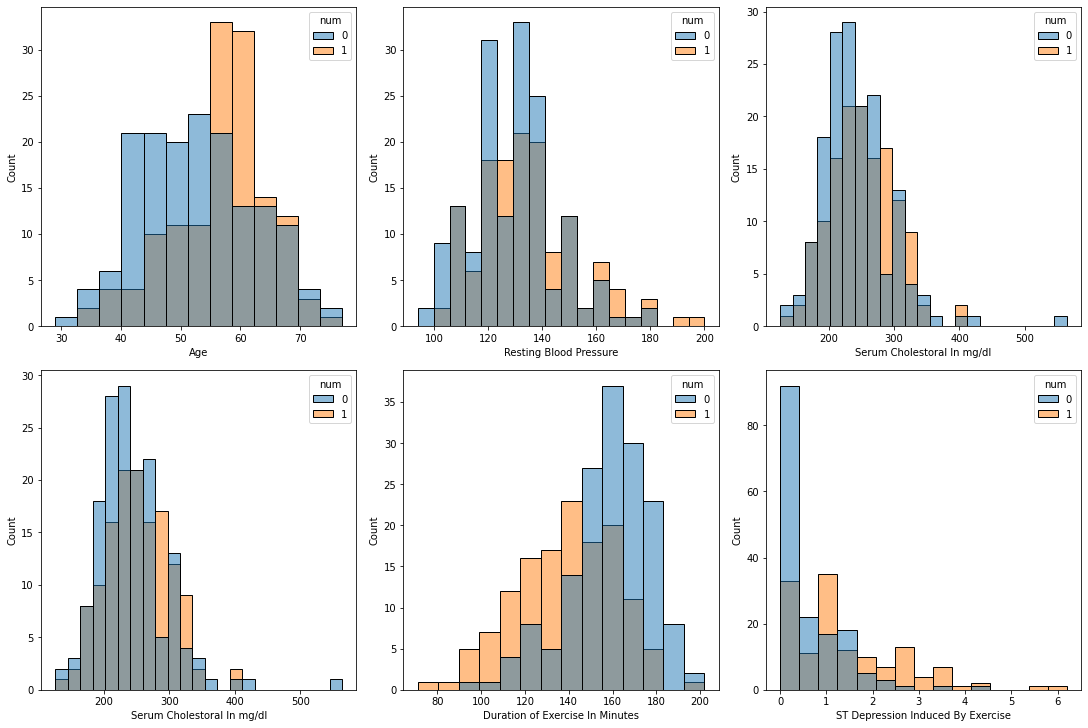

In [11]:
dv.hist_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

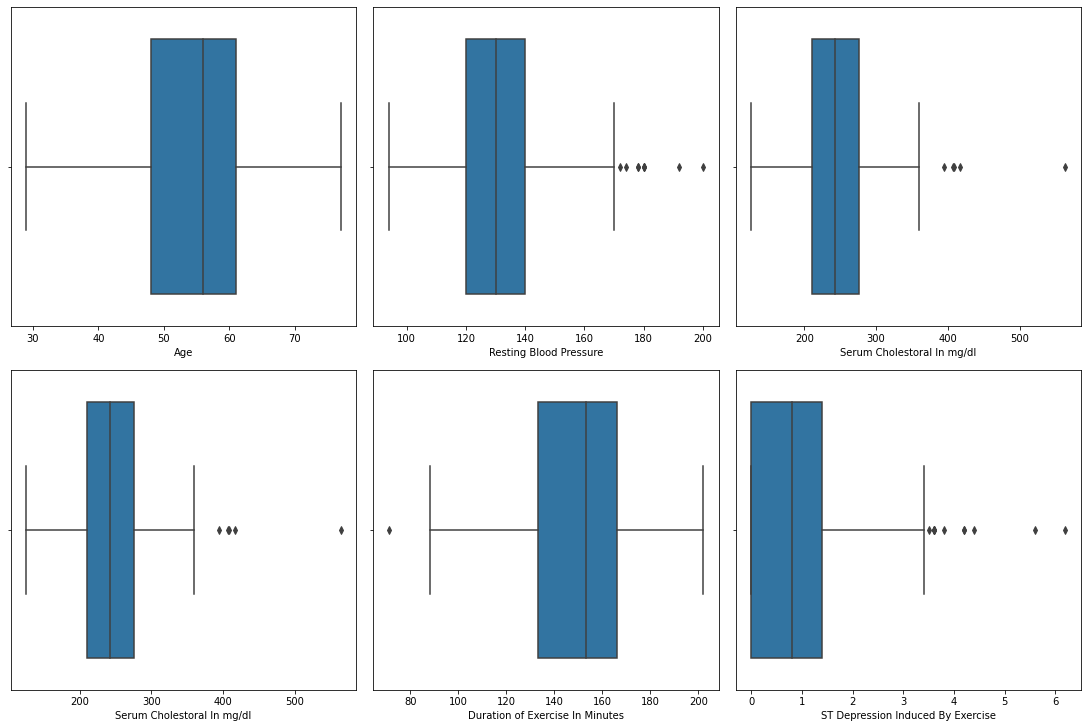

In [12]:
dv.box_plot_continuous(drop_missing_cleveland,continuous,names,n=3,m=2,hue='num')

<a id="chapter_4" name="chapter_4">chapter_4</a>

<h2 style="text-align:center">Algorithm</h2>

> Train a model to predict heart disease 
> * Perform Hyperparameter Tuning

> Optimize the model to predict heart disease 
> * Perform Hyperparameter Tuning

> Train a state of the art algorithm

> Compare the three models and interpret the results
\

> Finalize the choice of the final model

<a id="section_4_1" name="section_4_1">section_4_1</a>

<h4 style="color:lightcoral"><strong>Data Preparation</strong></h4>

> Train Validation Test Split

> Cross-Validation using K-Fold

> Set the hyperparameters of the model


In [13]:
model_dataset = encode_drop_missing_heart.copy()
model_dataset = dp.minmax_scale(model_dataset)
model_dataset = dp.add_bias(model_dataset)
model_dataset = model_dataset.sample(frac=1).reset_index(drop=True)
model_dataset

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,num
0,1.0,0.625000,0.415094,0.368534,0.847328,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
1,1.0,0.291667,0.358491,0.519397,0.496183,0.161290,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
2,1.0,0.437500,0.330189,0.206897,0.702290,0.000000,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
3,1.0,0.583333,0.669811,0.407328,0.404580,0.161290,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
4,1.0,0.437500,0.245283,0.256466,0.664122,0.258065,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,0.645833,0.339623,0.329741,0.557252,0.225806,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
295,1.0,0.854167,0.584906,0.312500,0.549618,0.000000,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
296,1.0,0.500000,0.433962,0.221983,0.641221,0.500000,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1
297,1.0,0.583333,0.150943,0.506466,0.549618,0.161290,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [14]:
X = model_dataset.iloc[:,:-1]
y = model_dataset.iloc[:,-1] # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sixty_split =  int(len(model_dataset) * 0.6)
twenty_split = int(len(model_dataset) * 0.2)
X_train = X.iloc[:sixty_split];X_valid = X.iloc[sixty_split:sixty_split+twenty_split];X_test = X.iloc[sixty_split+twenty_split:]
y_train = y.iloc[:sixty_split];y_valid = y.iloc[sixty_split:sixty_split+twenty_split];y_test = y.iloc[sixty_split+twenty_split:]

In [15]:
training_data = X_train.join(y_train)
validation_data = X_valid.join(y_valid)
testing_data = X_test.join(y_test)
testing_data.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,fbs_1,restecg_0,restecg_1,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,num
238,1.0,0.333333,0.452830,0.450431,0.580153,0.000000,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1
239,1.0,0.270833,0.509434,0.310345,0.816794,0.129032,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0
240,1.0,0.645833,0.433962,0.415948,0.755725,0.193548,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1
241,1.0,0.291667,0.150943,0.239224,0.687023,0.000000,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0
242,1.0,0.541667,0.622642,0.407328,0.564885,0.129032,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1


In [16]:
learning_rates =  [0.3,0.4,0.5,0.6]
regularization_terms=[0,0.005,0.008,0.1]
epochs = [120,150,200,250]

<a id="section_4_2" name="section_4_2">section_4_2</a>

<h4 style="color:lightcoral"><strong>Training A Model</strong></h4>

> Train A Logistic Regression Model

> Train A Regularized Model

> Train An Optimized Logistic Regression Model Using Mini-Batch Gradient Descent

> Tune hyperparameters

> Choose the best model


In [17]:
hyperparameter = lr.validation_with_regularization(training_data,validation_data,y_valid,learning_rates = learning_rates,epochs =epochs) 

In [18]:
lrate = learning_rates[hyperparameter]
nepochs = epochs[hyperparameter]
regularized_term=regularization_terms[hyperparameter]
print("The tuned learning rate hyperparemter is :", lrate)
print("The tuned epochs hyperparemter is :", nepochs)
print("The tuned regularized_term hyperparemter is :", regularized_term)

The tuned learning rate hyperparemter is : 0.3
The tuned epochs hyperparemter is : 120
The tuned regularized_term hyperparemter is : 0


In [19]:
types = ["bincross","regularization","bincross_mini_batch"]
type_titles = ["Logistic Regression","Logistic Regression With Regularization","Logistic Regression With Mini-Batch Gradient Descent"]
normal_avg_acc,normal_predictions,normal_results,normal_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="bincross")
regularization_avg_acc,regularization_predictions,regularization_results,regularization_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="regularization")
mini_batch_avg_acc,mini_batch_predictions,mini_batch_results,mini_batch_ = lr.average_results(training_data,testing_data,y_test,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="bincross_mini_batch")

In [20]:
print("The accuracy for logistic regression model without regularization is: {}%".format(normal_avg_acc))
print("The accuracy for regularized logistic regression model is: {}%".format(regularization_avg_acc))
print("The accuracy for optimized logistic regression model using mini-batch is: {}%".format(mini_batch_avg_acc))

The accuracy for logistic regression model without regularization is: 75.40983606557377%
The accuracy for regularized logistic regression model is: 78.68852459016394%
The accuracy for optimized logistic regression model using mini-batch is: 77.70491803278688%


In [21]:
results = [normal_results,regularization_results,mini_batch_results]
predictions =[normal_predictions,regularization_predictions,mini_batch_predictions]
errors = [normal_,regularization_,mini_batch_]

In [22]:
predicted_dataset = testing_data.copy()
predicted_dataset['normal_predictions'] = normal_results
predicted_dataset['regularized_predictions'] = regularization_results
predicted_dataset['optimized_predictions'] = mini_batch_results
predicted_dataset.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,exang_0,exang_1,slope_1,slope_2,ca_0,ca_1,num,normal_predictions,regularized_predictions,optimized_predictions
238,1.0,0.333333,0.452830,0.450431,0.580153,0.000000,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1,1,1,1
239,1.0,0.270833,0.509434,0.310345,0.816794,0.129032,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1
240,1.0,0.645833,0.433962,0.415948,0.755725,0.193548,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1
241,1.0,0.291667,0.150943,0.239224,0.687023,0.000000,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0
242,1.0,0.541667,0.622642,0.407328,0.564885,0.129032,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1,1,1,1


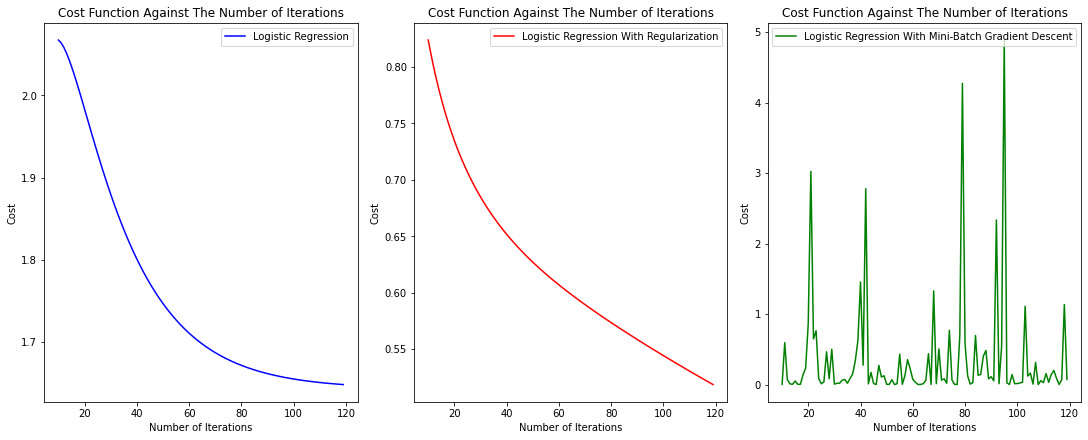

In [23]:
acc.plot_cost_functions(nepochs,errors,type_titles)

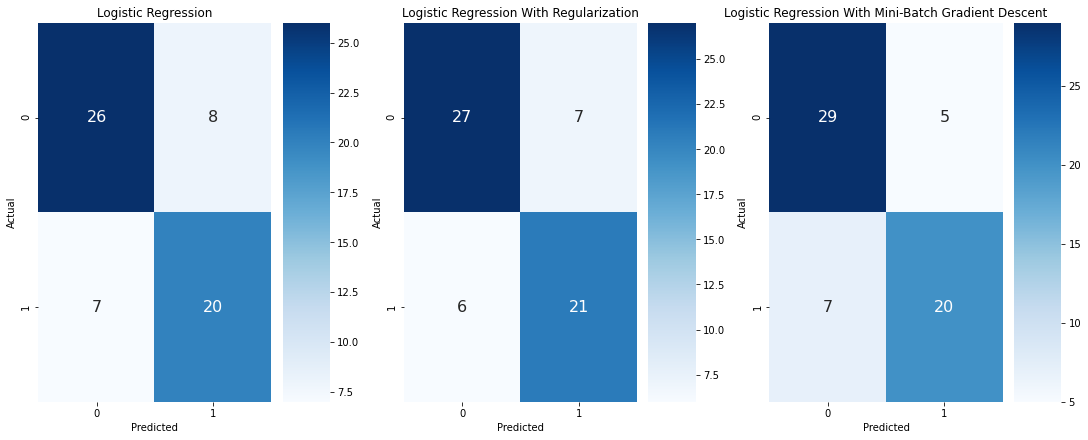

In [24]:
acc.display_confusion_matrices(y_test,results,type_titles)

No Skill for Logistic Regression: ROC AUC=50.0
Logistic Regression: ROC AUC=88.12636165577342
No Skill for Logistic Regression With Regularization: ROC AUC=50.0
Logistic Regression With Regularization: ROC AUC=89.43355119825709
No Skill for Logistic Regression With Mini-Batch Gradient Descent: ROC AUC=50.0
Logistic Regression With Mini-Batch Gradient Descent: ROC AUC=89.54248366013071


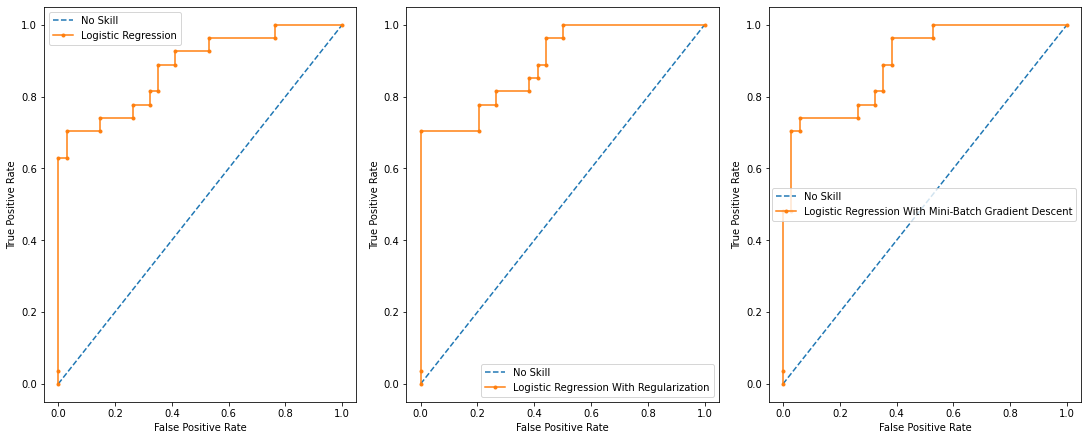

In [25]:
acc.plot_roc_curves(y_test,predictions,type_titles)

The best model is the regularized logistic regression model because it has the highest AUC value

<a id="section_4_3" name="section_4_3">section_4_3</a>

<h4 style="color:lightcoral"><strong>Training A State of The Art Model</strong></h4>

> Train A State of The Art Logistic Regression Model

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
chosen_titles = ["State of the Art Model","Best Model"]
compare_results = [y_pred,regularization_results]
compare_predictions = [y_pred_proba,regularization_predictions]

In [27]:
print("The accuracy of the state of the art logistic regression  is: {}".format(acc.accuracy_metric(y_test,y_pred)))
print("The accuracy of the best logistic regression  is: {}".format(regularization_avg_acc))

The accuracy of the state of the art logistic regression  is: 77.04918032786885
The accuracy of the best logistic regression  is: 78.68852459016394


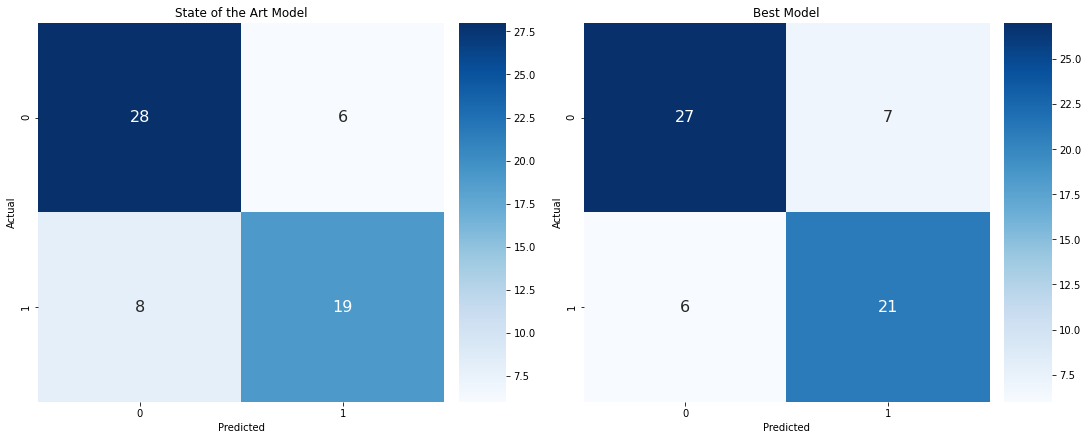

In [28]:
acc.display_confusion_matrices(y_test,compare_results,chosen_titles)

No Skill for State of the Art Model: ROC AUC=50.0
State of the Art Model: ROC AUC=88.88888888888889
No Skill for Best Model: ROC AUC=50.0
Best Model: ROC AUC=89.43355119825709


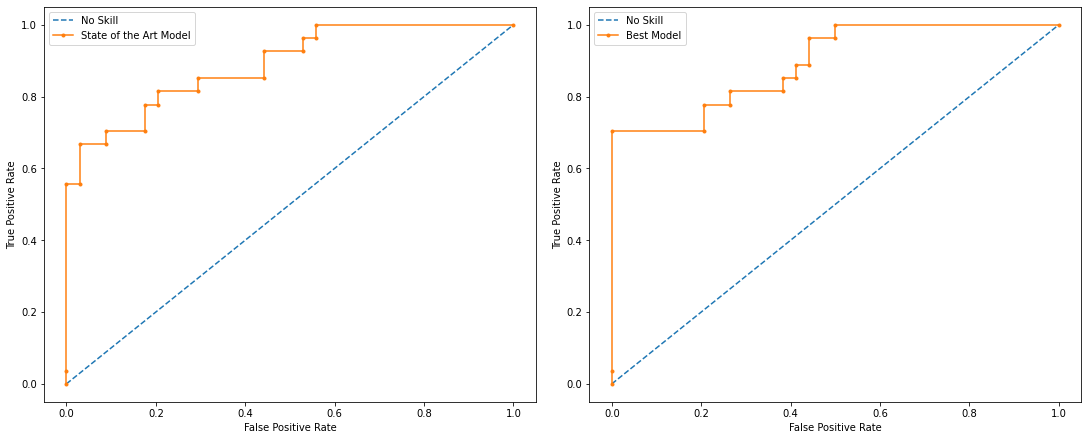

In [29]:
acc.plot_roc_curves(y_test,compare_predictions,chosen_titles)

<a id="section_4_4" name="section_4_4">section_4_4</a>

<h4 style="color:lightcoral"><strong>Compare Model Performance</strong></h4>

> Compare the state of the art and the best chosen model

We can see that the regularized logisitic regression model outperformed the state of the art algorithm in terms of the ROC curve and AUC value

<a id="section_4_5" name="section_4_5">section_4_5</a>

<h4 style="color:lightcoral"><strong>Compare Best Dataset</strong></h4>

> Run regularized logistic regression on the other datasets

In [30]:
mode_dataset = encode_mode_heart.copy()
mode_dataset = dp.minmax_scale(mode_dataset)
mode_dataset = dp.add_bias(mode_dataset)
mode_dataset = mode_dataset.sample(frac=1).reset_index(drop=True)
mode_dataset

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,ca_0,ca_1,num
0,1.0,0.510204,0.600,0.407960,0.394366,0.295455,1.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
1,1.0,0.265306,0.675,0.336650,0.507042,0.295455,0.833333,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,1.0,0.530612,0.550,0.341625,0.338028,0.295455,0.000000,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
3,1.0,0.734694,0.650,0.502488,0.436620,0.409091,0.000000,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,1.0,0.346939,0.550,0.000000,0.549296,0.284091,1.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,1.0,0.693878,0.550,0.000000,0.422535,0.352273,0.000000,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
911,1.0,0.224490,0.550,0.452736,0.507042,0.295455,1.000000,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
912,1.0,0.632653,0.750,0.351575,0.683099,0.477273,0.000000,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
913,1.0,0.897959,0.800,0.000000,0.380282,0.477273,1.000000,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [31]:
X_mode = mode_dataset.iloc[:,:-1]
y_mode = mode_dataset.iloc[:,-1] # # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
sixty_split =  int(len(mode_dataset) * 0.6)
twenty_split = int(len(mode_dataset) * 0.2)
X_train_mode = X_mode.iloc[:sixty_split];X_valid_mode = X_mode.iloc[sixty_split:sixty_split+twenty_split];X_test_mode = X_mode.iloc[sixty_split+twenty_split:]
y_train_mode = y_mode.iloc[:sixty_split];y_valid_mode = y_mode.iloc[sixty_split:sixty_split+twenty_split];y_test_mode = y_mode.iloc[sixty_split+twenty_split:]

In [32]:
training_data_mode = X_train_mode.join(y_train_mode)
validation_data_mode = X_valid_mode.join(y_valid_mode)
testing_data_mode = X_test_mode.join(y_test_mode)
testing_data_mode.head()

,Bias,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_1,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,ca_0,ca_1,num
732,1.0,0.346939,0.55,0.437811,0.507042,0.431818,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
733,1.0,0.142857,0.75,0.437811,0.760563,0.295455,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
734,1.0,0.857143,0.80,0.446103,0.366197,0.625000,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1
735,1.0,0.163265,0.60,0.442786,0.704225,0.636364,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
736,1.0,0.428571,0.60,0.235489,0.633803,0.295455,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [33]:
lrate = learning_rates[hyperparameter]
nepochs = epochs[hyperparameter]
regularized_term=regularization_terms[hyperparameter]

In [34]:
mode_regularization_avg_acc,mode_regularization_predictions,mode_regularization_results,mode_regularization_ = lr.average_results(training_data_mode,testing_data_mode,y_test_mode,lrate=lrate,nepochs=nepochs,regularized_term=regularized_term,niters=5,batch_size=32,type_="regularization")

In [35]:
choose_results = [regularization_results,mode_regularization_results]
choose_predictions =[regularization_predictions,mode_regularization_predictions]
choose_errors = [regularization_,mode_regularization_]
choose_titles = ["Regularized Logistic With Dropped Missing Data","Regularized Logistic With Mode Replacing Missing Data "]

In [41]:
print("The accuracy for {} is {}%".format(choose_titles[0],regularization_avg_acc))
print("The accuracy for {} is {}%".format(choose_titles[1],mode_regularization_avg_acc))

The accuracy for Regularized Logistic With Dropped Missing Data is 78.68852459016394%
The accuracy for Regularized Logistic With Mode Replacing Missing Data  is 80.87431693989072%


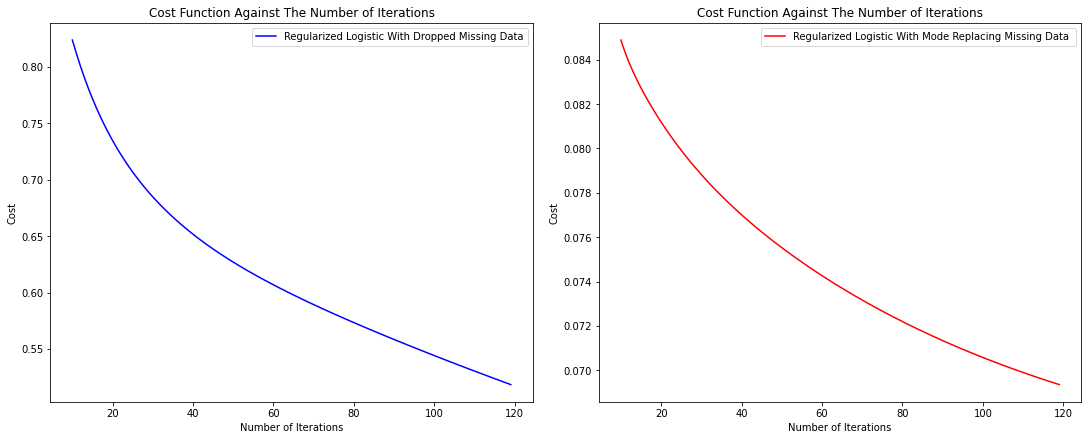

In [36]:
acc.plot_cost_functions(nepochs,choose_errors,choose_titles)

Text(0.5, 1.0, 'Regularized Logistic With Dropped Missing Data')

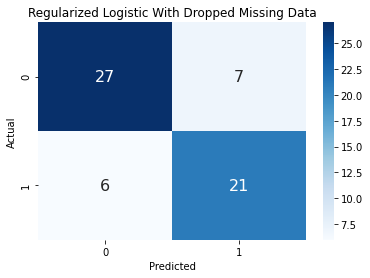

In [37]:
acc.display_confusion_matrix(y_test,regularization_results)
plt.title(choose_titles[0])

Text(0.5, 1.0, 'Regularized Logistic With Mode Replacing Missing Data ')

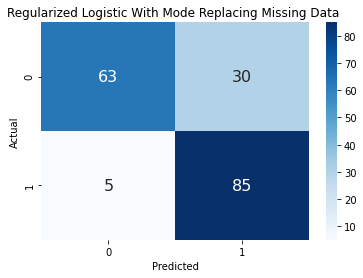

In [38]:
acc.display_confusion_matrix(y_test_mode,mode_regularization_results)
plt.title(choose_titles[1])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.894


Text(0.5, 1.0, 'Regularized Logistic With Dropped Missing Data')

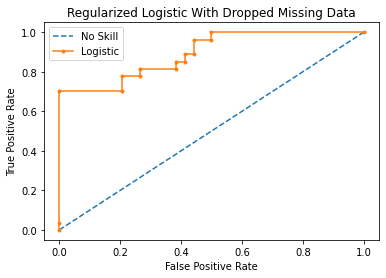

In [40]:
acc.plot_roc_curve(y_test,regularization_predictions)
plt.title(choose_titles[0])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.863


Text(0.5, 1.0, 'Regularized Logistic With Mode Replacing Missing Data ')

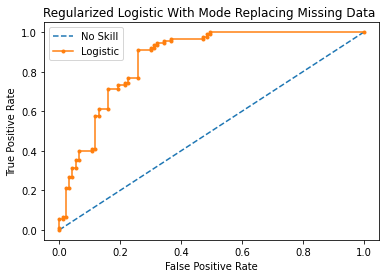

In [43]:
acc.plot_roc_curve(y_test_mode,mode_regularization_predictions)
plt.title(choose_titles[1])

<a id="section_4_6" name="section_4_6">section_4_6</a>


<h4 style="color:lightcoral"><strong>Future Work</strong></h4>
Our algorithm has taken account of all datasets. Prior research perform algorithms on their respective datasets relative to their schools. We have further extended and improved their algorithm to give a better diagnosis on whether a patient has heart disease. 

We investigated our algorithms by using the combined datasets in two different ways. We dropped the missing values and replaced the missing values with the mode of the feature. The performance an algorithm trained on data that learns the outcome of the missing values is left for investigations

<a id="section_4_7" name="section_4_7">section_4_7</a>

<h4 style="color:lightcoral"><strong>Conclusion</strong></h4>


[back to top](#section_n)